In [1]:
# set env via .env file
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), verbose=True)

import os
import sys
import pathlib 
import numpy as np
import pandas as pd
import tensorflow as tf
from importlib import reload
import pandas_datareader.data as web
import requests_cache
import datetime
import munch

import math
from cachetools import TTLCache
import time
import ray
import psutil
from sqlalchemy import create_engine
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid
import mpl_finance as mf

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import shared
import provider_yfinance as provider
import plot

reload(shared)
reload(provider)
reload(plot)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

<module 'plot' from '/mnt/c/notebooks/sandbox/plot.py'>

In [2]:
plot.Notebook()

mpl.rcParams['figure.figsize'] = (16, 9)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

cfg = shared.get_config('^GDAXI', False)
shared.save_config(cfg)

shared> current directory:/mnt/c/notebooks/sandbox
shared> read from config file: Munch({'benchmarks': ['000001.SS', 'AUDUSD=X', 'B0=F', 'BO=F', 'BTCUSD=X', 'BZ=F', 'C=F', 'CC=F', 'CL=F', 'CNY=X', 'CT=F', 'ETHUSD=X', 'EURCAD=X', 'EURCHF=X', 'EURGBP=X', 'EURHUF=X', 'EURJPY=X', 'EURJPY=X', 'EURSEK=X', 'EURUSD=X', 'FC=F', 'GBPJPY=X', 'GBPUSD=X', 'GC=F', 'HG=F', 'HKD=X', 'HO=F', 'IDR=X', 'IMOEX.ME', 'INR=X', 'JPY=X', 'KC=F', 'KW=F', 'LB=F', 'LC=F', 'LH=F', 'MXN=X', 'MYR=X', 'NG=F', 'NZDUSD=X', 'O=F', 'OJ=F', 'PA=F', 'PHP=X', 'PL=F', 'RB=F', 'RR=F', 'RUB=X', 'S=F', 'SB=F', 'SGD=X', 'SI=F', 'SM=F', 'THB=X', 'ZAR=X', 'ZG=F', 'ZI=F', '^AORD', '^AXJO', '^BFX', '^BSESN', '^BUK100P', '^BVSP', '^CASE30', '^DJI', '^FCHI', '^FTSE', '^GDAXI', '^GSPC', '^GSPTSE', '^HSI', '^IPSA', '^IXIC', '^JKSE', '^JN0U.JO', '^KLSE', '^KS11', '^MERV', '^MXX', '^N100', '^N225', '^NYA', '^NZ50', '^RUT', '^STI', '^STOXX50E', '^TA125.TA', '^TWII', '^VIX', '^XAX'], 'cache_dir': '/mnt/c/notebooks/sandbox/cache', 'cache_ena

In [3]:
%%time

cfg_stocks, data_stocks = provider.load_stocks(cfg)

CPU times: user 172 ms, sys: 78.1 ms, total: 250 ms
Wall time: 232 ms


In [4]:
%%time

cfg_benchmarks, data_benchmarks = provider.load_benchmarks(cfg)

ticker-000001.SS> loading ticker data ...
ticker-AUDUSD=X> loading ticker data ...
ticker-B0=F> loading ticker data ...
- B0=F: 1d data not available for startTime=-2208988800 and endTime=1575491826. Only 100 years worth of day granularity data are allowed to be fetched per request.
ticker-BO=F> loading ticker data ...
ticker-BTCUSD=X> loading ticker data ...
ticker-BZ=F> loading ticker data ...
ticker-C=F> loading ticker data ...
ticker-CC=F> loading ticker data ...
ticker-CL=F> loading ticker data ...
ticker-CNY=X> loading ticker data ...
ticker-CT=F> loading ticker data ...
ticker-ETHUSD=X> loading ticker data ...
ticker-EURCAD=X> loading ticker data ...
ticker-EURCHF=X> loading ticker data ...
ticker-EURGBP=X> loading ticker data ...
ticker-EURHUF=X> loading ticker data ...
ticker-EURJPY=X> loading ticker data ...
ticker-EURJPY=X> loading ticker data ...
ticker-EURSEK=X> loading ticker data ...
ticker-EURUSD=X> loading ticker data ...
ticker-FC=F> loading ticker data ...
ticker-GBP

ProviderException: 129

In [5]:
horizon_cfg = cfg.train_horizon_config[-1]
dates = next(shared.filter_dates_generator(cfg, horizon_cfg))
dates

Munch({'train_start_dt': datetime.datetime(2019, 9, 11, 0, 0), 'train_end_dt': datetime.datetime(2019, 10, 23, 0, 0), 'predict_start_dt': datetime.datetime(2019, 10, 24, 0, 0), 'predict_end_dt': datetime.datetime(2019, 10, 30, 0, 0)})

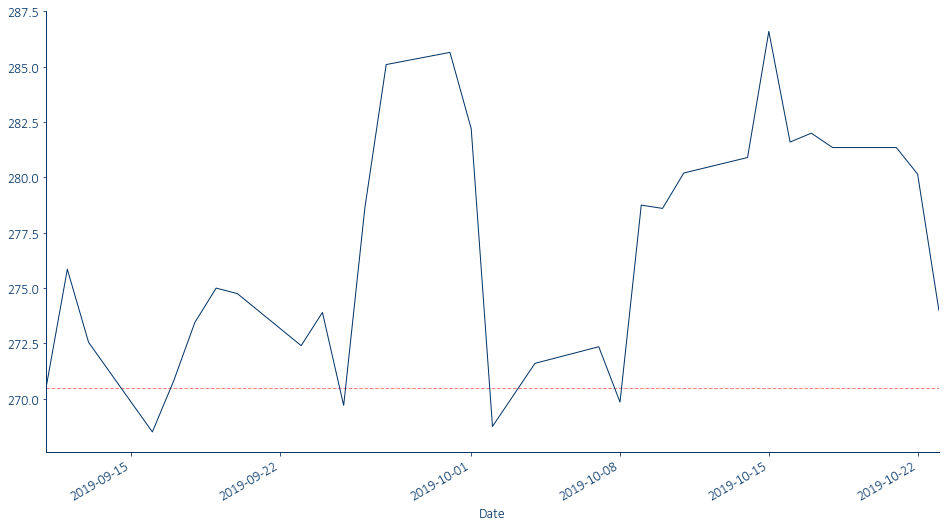

In [6]:
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates)
s.plot()
plt.hlines(s[0], xmin=s.index[0], xmax=s.index[-1], colors='red', linestyles='dashed', alpha=.5)

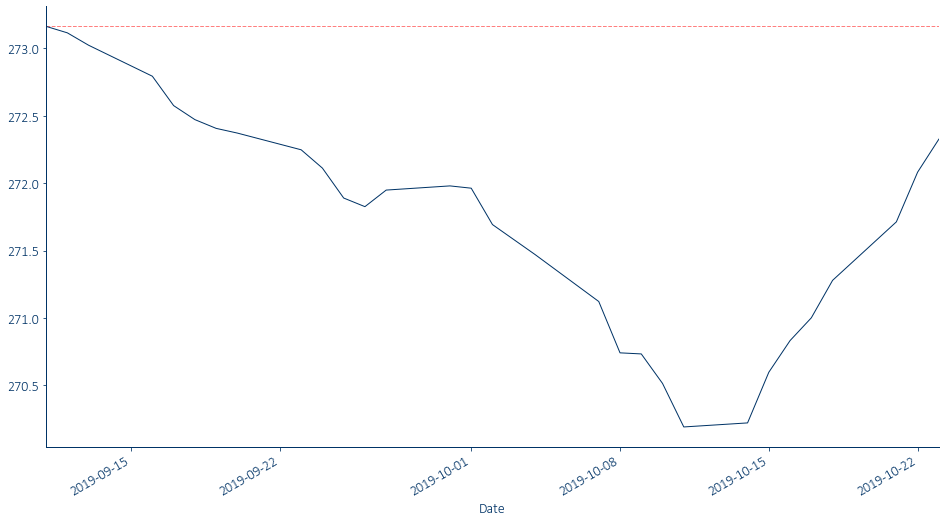

In [7]:
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_ma(cfg.train_window_trading_days[-1]))
s.plot()
plt.hlines(s[0], xmin=s.index[0], xmax=s.index[-1], colors='red', linestyles='dashed', alpha=.5)

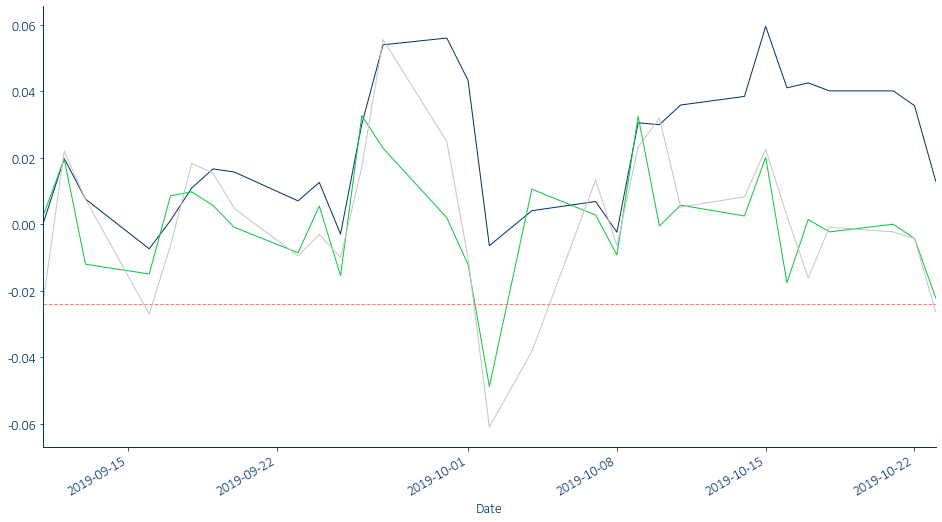

In [8]:
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_rel) - 1
s.plot()
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_loglag(cfg.train_lag_trading_days[0]))
s.plot()
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_loglag(cfg.train_lag_trading_days[1]))
s.plot()
plt.hlines(s[0], xmin=s.index[0], xmax=s.index[-1], colors='red', linestyles='dashed', alpha=.5)